## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _Разуваев Никита Сергеевич_

### Общая информация

__Дата выдачи:__ 08.03.2019

__Дедлайн:__ 23:59 19.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / \text{max points},
$$

где points — количество баллов, которое вы набрали, max_points - максимальное число баллов за задание. Бонусные задания отмечены звездочками (*)

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).


# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline

In [0]:
class KNN:
    def __init__(self, metric='euclid', k=5):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        
        self.X_train = X_train
        self.y_train = y_train

        return self
    
    def dist(self, x_i, x):
        if self.metric == 'euclid':
          return np.sqrt(np.sum((x_i - x) ** 2, axis=1))
        elif self.metric == 'manhattan':
          return np.sum(np.abs(x_i - x), axis=1)
        raise ValueError('Wrong metric: use \'euclid\' or \'manhattan\'')

    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        y_pred = np.zeros((X_test.shape[0],))

        for i in range(len(X_test)):
          dist = KNN.dist(self, self.X_train, X_test[i])
          neigh = np.argsort(dist)[:self.k]
          weights = 1 / dist[neigh]
          y_pred[i] = np.sum(weights * self.y_train[neigh]) / np.sum(weights)

        return y_pred

In [0]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [0]:
# your code here

for i in [1, 2, 5, 10, 20, 35, 50, 100]:
  print('k = %d' % i)
  for j in [('euclid', 2), ('manhattan', 1)]:
    my_knn = KNN(k = i, metric=j[0])
    y_my_knn = my_knn.fit(X_train, y_train).predict(X_test)
    print('MSE of my KNN = %.6f, distance = %s' % (MSE(y_my_knn, y_test), j[0]))

    knn = neighbors.KNeighborsRegressor(i, weights='distance', p=j[1])
    y_knn = knn.fit(X_train, y_train).predict(X_test)
    print('MSE of sklearn KNN = %.6f, distance = %s' % (MSE(y_knn, y_test), j[0]))
  print('-'*40)

k = 1
MSE of my KNN = 2.039018, distance = euclid
MSE of sklearn KNN = 2.039018, distance = euclid
MSE of my KNN = 1.867686, distance = manhattan
MSE of sklearn KNN = 1.867686, distance = manhattan
----------------------------------------
k = 2
MSE of my KNN = 1.461015, distance = euclid
MSE of sklearn KNN = 1.461015, distance = euclid
MSE of my KNN = 1.361493, distance = manhattan
MSE of sklearn KNN = 1.361493, distance = manhattan
----------------------------------------
k = 5
MSE of my KNN = 1.143365, distance = euclid
MSE of sklearn KNN = 1.143365, distance = euclid
MSE of my KNN = 1.176825, distance = manhattan
MSE of sklearn KNN = 1.176825, distance = manhattan
----------------------------------------
k = 10
MSE of my KNN = 1.075290, distance = euclid
MSE of sklearn KNN = 1.075290, distance = euclid
MSE of my KNN = 1.067471, distance = manhattan
MSE of sklearn KNN = 1.067471, distance = manhattan
----------------------------------------
k = 20
MSE of my KNN = 1.066819, distance =

# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [0]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        
        self.w = np.zeros((X_train.shape[1],))
        self.loss_history = np.zeros((self.max_iter + 1,))
        
        loss = LinearRegressionHuber.calc_loss(self, X_train, y_train)
        self.loss_history[0] = loss

        for it in range(self.max_iter):
          grad = LinearRegressionHuber.calc_gradient(self, X_train, y_train)
          self.w = self.w - self.eta * grad
          loss = LinearRegressionHuber.calc_loss(self, X_train, y_train)
          self.loss_history[it + 1] = loss
          if loss <= self.tol:
            return self.loss_history
        
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        return X_test.dot(self.w)
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        """
        
        deviation = X.dot(self.w) - y
        isLessThanDelta = np.abs(deviation) <= self.delta
        return (X[isLessThanDelta].T.dot(deviation[isLessThanDelta]) + np.sum(
            np.sign(deviation[np.invert(isLessThanDelta)]) * X[np.invert(isLessThanDelta)].T * self.delta, axis = 1
            )) / len(X)
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """

        absDeviation = np.abs(X.dot(self.w) - y)
        isLessThanDelta = absDeviation <= self.delta
        return (np.sum(
            0.5 * absDeviation[isLessThanDelta] ** 2
            ) + np.sum(
                self.delta * absDeviation[np.invert(isLessThanDelta)] - 0.5 * self.delta ** 2
                )) / len(X)
        

In [0]:
# your code here
LRH = LinearRegressionHuber()
loss = LRH.fit(X_train, y_train)
print('Huber loss of Huber linear regression = %.6f' % loss[-1])
print('MSE of Huber linear regression = %.6f, while' % MSE(LRH.predict(X_test), y_test))
print('MSE of KNN regression = %.6f' % MSE(y_my_knn, y_test))

Huber loss of Huber linear regression = 0.408057
MSE of Huber linear regression = 1.091952, while
MSE of KNN regression = 1.027839


In [0]:
print('Result of prediction:')
print(LRH.predict(X_test))

Result of prediction:
[-3.55370312e-02  2.18176639e-01  2.38926839e-01 -4.59752082e-01
 -2.69902916e-01  1.85179832e-01  2.74911295e-01 -5.38322912e-01
  2.66224276e-01  2.28563286e-01  5.39649828e-01 -1.15612957e-02
  1.94290451e-02 -3.04600165e-01 -6.77298206e-02  5.73273606e-02
 -1.91955901e-01  3.90303281e-02 -2.31956548e-02 -3.33959913e-02
  3.73673762e-02  5.37379449e-02 -3.05267467e-02  6.63634978e-02
  5.48114439e-02 -3.05656884e-01 -1.58746932e-01 -2.28737845e-01
 -1.15400078e-01 -2.32307538e-01  3.30832868e-01  4.89827557e-01
  1.23740436e-01 -3.03749797e-01 -2.34136357e-01  1.45533803e-02
 -1.27396991e-01  1.50370930e-02 -1.75205121e-01 -8.21344213e-01
 -2.64551373e-01 -1.86654938e-02  5.33485625e-01  8.78684479e-02
  1.76654007e-02 -1.82286509e-01 -2.57828810e-01  2.84276086e-01
  1.31704229e-01 -2.61375244e-01 -3.86188060e-01 -2.22227071e-01
  3.99803626e-01  9.25841169e-02 -2.02012730e-01 -2.38172461e-01
 -1.05889275e-02 -1.31597485e-01 -2.58013824e-01 -3.00250856e-01
 -6

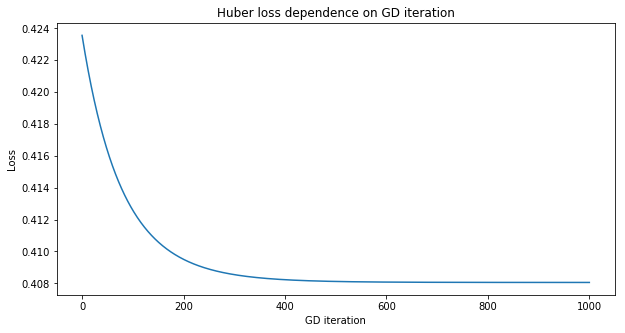

In [0]:
# your code here
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(np.arange(1001), loss)
ax.set_xlabel('GD iteration')
ax.set_ylabel('Loss')
ax.set_title('Huber loss dependence on GD iteration')
plt.show()

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [86]:
data = pd.read_csv('train.csv', header=0)

In [87]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [90]:
# your code here
print('В данных есть пропуски? - %s' % str(data.isnull().any().any()))
print('Пропуски обнаружены в слудующих столбцах: ')
miss = data.isnull().any()[data.isnull().any() == True]
print(miss)
print('-'*40)
for i in miss.index:
  print('В столбце %s: %d пропусков, их доля %.2f%%' % (i, sum(data[i].isnull()), float(100 * sum(data[i].isnull())) / len(data)))

В данных есть пропуски? - True
Пропуски обнаружены в слудующих столбцах: 
LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool
----------------------------------------
В столбце LotFrontage: 259 пропусков, их доля 17.74%
В столбце Alley: 1369 пропусков, их доля 93.77%
В столбце MasVnrType: 8 пропусков, их доля 0.55%
В столбце MasVnrArea: 8 пропусков, их доля 0.55%
В столбце BsmtQual: 37 пропусков, их доля 2.53%
В столбце BsmtCond: 37 пропусков, их доля 2.53%
В столбце BsmtExposure: 38 пропусков, их доля 2.60%
В столбце BsmtFinType1: 37 пропусков, их доля 2.53%
В столбце BsmtFinType2: 38 пропусков, их доля 2.60%
В столбце Electrical: 1

В некоторых столбцах количество пропусков минимально (**MasVnrType, Electrical** и т.д.), в то время как есть характеристики, данные о которых отсутствуют в большинстве наблюдений (столбцы **PoolQC, MiscFeature** и т.д.). Вероятно, некоторые признаки означают исключительные свойства домов, которыми не обладают остальные из данной выборки. 

Более того, если взглянуть на данные, то можно обнаружить куда больше пропусков (или отсутсвий значения). Столбцы, принимающие вещественные значения, такие как **EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea** и т.д. имеют множетство нулей. Скорее всего, это означает отсутствие у объекта указанного признака.

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [289]:
# your code here

# для вещественнозначных признаков заполним пропуски медианами, т.к. медиана менее чувствительна к большим отклонениям
objects = (data.dtypes == 'object').values
data_real = data[data.columns[~objects]]
mis_replacer = SimpleImputer(strategy='median')
data_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(data_real), columns=data_real.columns, index=data.index)

# категориальные признаки заполним строкой, означающей отсутствие значения
data_cat = data[data.columns[objects]].fillna("NG")
data_no_mis = pd.concat([data_no_mis_real, data_cat], axis=1)

In [290]:
print('Пропуски остались? - ' + str(data_no_mis.isnull().any().any()))

Пропуски остались? - False


## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [291]:
# your code here
data_no_mis = pd.get_dummies(data_no_mis, drop_first=True) # OneHotEncoding

Выбор OneHotEncoding обусловлен тем, что категориальные признаки не упорядочены, т.е. LabelEncoding не подходит.

In [340]:
data_no_mis.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [301]:
data_y = data_no_mis['SalePrice']
data_X = data_no_mis.drop('SalePrice', axis = 1)

In [302]:
data_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

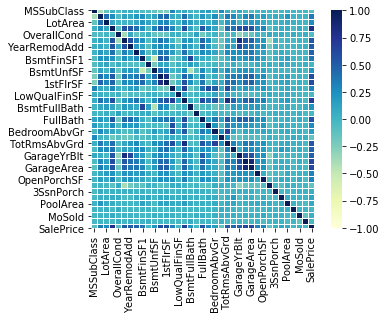

In [294]:
# your code here
correl = pd.DataFrame(data).corr()
sns.heatmap(correl, vmin = -1, vmax = 1, linewidths = 0.01, square = True, cmap="YlGnBu")
plt.show()

Большинство вещественных признаков не коррелируют между собой.

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [295]:
# your code here
maxCor = (data.corrwith(data['SalePrice']).drop('SalePrice')).idxmax()
minCor = (data.corrwith(data['SalePrice']).drop('SalePrice')).idxmin()
print('Признак с максимальным значением корреляции: %s' % maxCor)
print('Признак с минимальным значением корреляции: %s' % minCor)

Признак с максимальным значением корреляции: OverallQual
Признак с минимальным значением корреляции: KitchenAbvGr


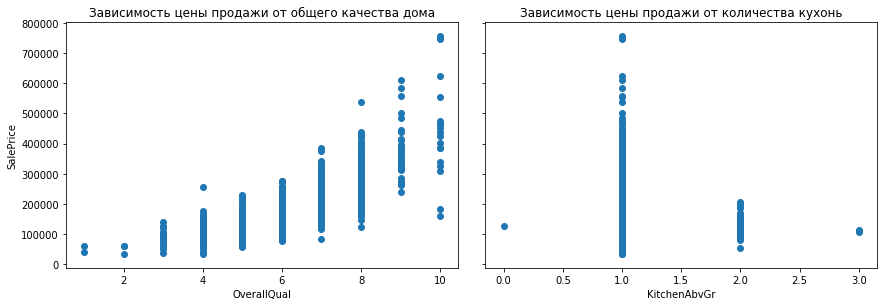

In [296]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey=True)
fig.tight_layout()
ax[0].scatter(data['OverallQual'], data['SalePrice'])
ax[0].set_ylabel('SalePrice')
ax[0].set_xlabel('OverallQual')
ax[0].set_title(u'Зависимость цены продажи от общего качества дома')
ax[1].scatter(data['KitchenAbvGr'], data['SalePrice'])
ax[1].set_xlabel('KitchenAbvGr')
ax[1].set_title(u'Зависимость цены продажи от количества кухонь')
plt.show()

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

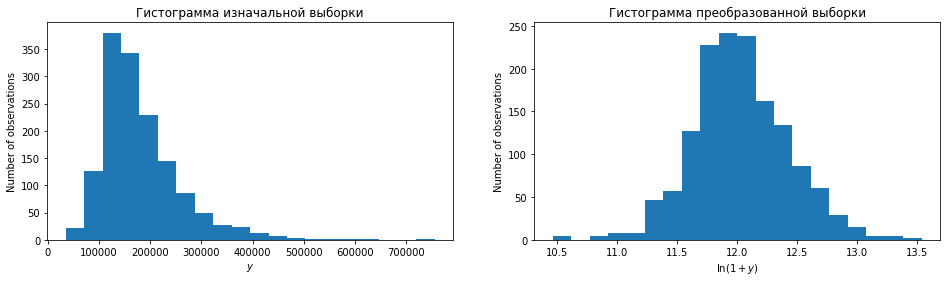

In [297]:
# your code here
fig, ax = plt.subplots(1, 2, figsize = (16, 4))
ax[0].set_title(u'Гистограмма изначальной выборки')
ax[0].hist(data['SalePrice'], bins = 20)
ax[0].set_xlabel('$y$')
ax[0].set_ylabel('Number of observations')

ax[1].set_title(u'Гистограмма преобразованной выборки')
ax[1].hist(np.log1p(data['SalePrice']), bins = 20)
ax[1].set_xlabel('$\ln(1 + y)$')
ax[1].set_ylabel('Number of observations')
plt.show()

In [298]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [299]:
np.log1p(data['SalePrice']).describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

У преобразованной выборки отсутсвует правосторонняя асимметрия, меньше разброс значения, что делает процесс предсказания для линейной модели весьма проще.

In [311]:
# Нормирование вещественных признаков
scaler = MinMaxScaler()
data_X[data_no_mis_real.columns.drop('SalePrice')] = pd.DataFrame(
    scaler.fit_transform(data_X[data_no_mis_real.drop('SalePrice', axis=1).columns]),
    columns=data_no_mis_real.drop('SalePrice', axis=1).columns)

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [321]:
X_train, X_val, y_train, y_val = train_test_split(data_X, np.log1p(data_y), random_state=17032019)

In [325]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 261), (365, 261), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [326]:
# your code here
# KNN
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 40, 2),
        'weights': ['distance', 'uniform'],
        'p': [1, 2, 3]
    },
    cv=5
)
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [327]:
print(grid_searcher.best_params_)
print(np.sqrt(mean_squared_error(grid_searcher.predict(X_val), y_val)))

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.18864888627792484


In [328]:
# линейная регрессия
grid_searcher_LR = GridSearchCV(
    LinearRegression(),
    param_grid={
        'fit_intercept': [True, False],
        'normalize': [False, True]
    },
    cv=5
)
grid_searcher_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [329]:
print(grid_searcher_LR.best_params_)
print(np.sqrt(mean_squared_error(grid_searcher_LR.predict(X_val), y_val)))

{'fit_intercept': False, 'normalize': False}
0.20136382798274022


In [338]:
# Lasso
grid_searcher_Las = GridSearchCV(
    Lasso(),
    param_grid={
        'fit_intercept': [True],
        'alpha': np.arange(0.001, 1.001, 0.001),
    },
    cv=5
)
grid_searcher_Las.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011,...
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ]),
                         'fit_intercept': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [339]:
print(grid_searcher_Las.best_params_)
print(np.sqrt(mean_squared_error(grid_searcher_Las.predict(X_val), y_val)))

{'alpha': 0.001, 'fit_intercept': True}
0.13330032639306758


In [332]:
# Ridge
grid_searcher_Rid = GridSearchCV(
    Ridge(),
    param_grid={
        'fit_intercept': [True, False],
        'alpha': np.arange(1, 100, 0.1)
    },
    cv=5
)
grid_searcher_Rid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,...
       94.5, 94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5,
       95.6, 95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6,
       96.7, 96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7,
       97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8,
       98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9]),
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_j

In [333]:
print(grid_searcher_Rid.best_params_)
print(np.sqrt(mean_squared_error(grid_searcher_Rid.predict(X_val), y_val)))

{'alpha': 4.900000000000004, 'fit_intercept': True}
0.1378168708269123


Видно, что все модели неплохо справились с поставленной задачей. Наилучший результат по метрике RMSE показывала модель LASSO.

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

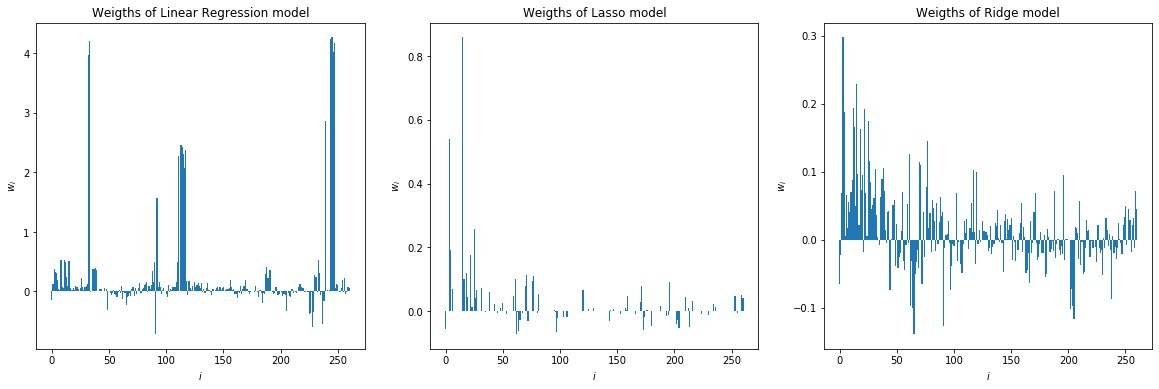

In [334]:
# your code here
fig, ax = plt.subplots(1, 3, figsize = (20, 6))

ax[0].bar(x = np.arange(X_val.shape[1]), height = grid_searcher_LR.best_estimator_.coef_, width = 1)
ax[0].set_title('Weigths of Linear Regression model')
ax[0].set_xlabel('$i$')
ax[0].set_ylabel('$w_i$')
ax[1].bar(x = np.arange(X_val.shape[1]), height = grid_searcher_Las.best_estimator_.coef_, width = 1)
ax[1].set_title('Weigths of Lasso model')
ax[1].set_xlabel('$i$')
ax[1].set_ylabel('$w_i$')
ax[2].bar(x = np.arange(X_val.shape[1]), height = grid_searcher_Rid.best_estimator_.coef_, width = 1)
ax[2].set_title('Weigths of Ridge model')
ax[2].set_xlabel('$i$')
ax[2].set_ylabel('$w_i$')

plt.show()

Исходя из гистограмм весов, можно сделать вывод, что модель линейной регресии отдельным признакам присвоила чрезвычайно высокие веса (отсутствует регуляризация), тогда как большинство весов близки по значению к нулю.

Модели с регуляризацией, лучше справившиеся с задачей, равномернее определили веса. В модели LASSO некоторые веса обнулились (в силу особенностей регуляризации), в то время как в модели Ridge практически все веса вносят некоторый вклад в предсказание.

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [0]:
# your code here

# Теория

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

# Решение

Перепишем условие следующим образом:

$$
\sum\limits_{i=1}^\ell
\begin{cases}
\tau \left(y_i - C\right), & y_i > C\\
(\tau - 1)\left(y_i - C\right), & y_i \leq C
\end{cases} \to \min_C
$$

Условия 1-ого порядка:

$$
\frac{\partial\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right)}{\partial C} = 0
$$

$$
\sum\limits_{i=1}^\ell
\begin{cases}
-\tau, & y_i > C\\
1 - \tau, & y_i \leq C
\end{cases} = 0
$$

Видно, что первая производная растет по $C$, значит вторая производная положительна. Следовательно, минимум достигается. Перепишем как:

$$
\sum\limits_{i=1}^\ell\left[y_i \leq C \right] - \sum\limits_{i=1}^\ell\tau = 0, \text{ откуда}
$$

$$
\frac{\sum\limits_{i=1}^\ell\left[y_i \leq C \right]}{\ell} = \tau
$$

Это равенство показывает, что необходимо выбрать такую $C$, чтобы доля $y_i \leq C$ была равна $\tau$. Значит, $C = y_{(\tau)}$ значение квантиля $\tau$. 

При поиске необходимого квантиля, пользуемся правилами мат. статистики и теории вероятностей)